# Word2Vec Training for IMDB Sentiment Analysis

This notebook trains a Word2Vec model on IMDB movie reviews to create word embeddings that can be used for sentiment classification.

In [3]:
import warnings
import logging
warnings.filterwarnings('ignore')
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import nltk
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import pandas as pd
import numpy as np

# Download required NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)

def word2vec_train(data_path, vector_size=100, window=5, min_count=2, sg=1, epochs=10):
    """
    Train Word2Vec model on IMDB reviews
    
    Parameters:
    -----------
    data_path : str
        Path to CSV file containing reviews
    vector_size : int
        Dimensionality of word vectors (default: 100)
    window : int
        Maximum distance between current and predicted word (default: 5)
    min_count : int
        Ignores words with frequency less than this (default: 2)
    sg : int
        Training algorithm: 0 for CBOW, 1 for Skip-gram (default: 1)
    epochs : int
        Number of training iterations (default: 10)
    """
    
    print("Loading data...")
    data = pd.read_csv(data_path)
    
    # Check if review_text column exists
    if 'review_text' not in data.columns:
        print(f"Available columns: {data.columns.tolist()}")
        raise ValueError("'review_text' column not found in the dataset")
    
    print(f"Loaded {len(data)} reviews")
    
    # Tokenize reviews into sentences
    print("\nTokenizing reviews...")
    sentences = []
    for idx, review in enumerate(data['review_text']):
        if pd.notna(review):  # Skip NaN values
            # Use simple_preprocess to tokenize (lowercases and removes punctuation)
            tokens = simple_preprocess(str(review), deacc=True)
            if tokens:  # Only add non-empty token lists
                sentences.append(tokens)
        
        if (idx + 1) % 5000 == 0:
            print(f"  Processed {idx + 1} reviews...")
    
    print(f"\nTotal sentences for training: {len(sentences)}")
    print(f"Sample tokenized review: {sentences[0][:20]}...")  # Show first 20 tokens
    
    # Train Word2Vec model
    print(f"\nTraining Word2Vec model...")
    print(f"  Vector size: {vector_size}")
    print(f"  Window: {window}")
    print(f"  Min count: {min_count}")
    print(f"  Algorithm: {'Skip-gram' if sg == 1 else 'CBOW'}")
    print(f"  Epochs: {epochs}")
    
    model = Word2Vec(
        sentences=sentences,
        vector_size=vector_size,
        window=window,   
        min_count=min_count,
        sg=sg,
        workers=4,
        epochs=epochs,
        seed=42
    )
    
    print(f"\nModel trained successfully!")
    print(f"Vocabulary size: {len(model.wv)}")
    
    # Test the model with some examples
    print("\n" + "="*60)
    print("Testing the model:")
    print("="*60)
    
    # Example 1: Get vector for a word
    test_words = ['movie', 'film', 'good', 'bad', 'actor']
    for word in test_words:
        if word in model.wv:
            word_vector = model.wv[word]
            print(f"\nVector for '{word}' (first 5 dimensions): {word_vector[:5]}")
        else:
            print(f"\n'{word}' not in vocabulary")
    
    # Example 2: Find similar words
    print("\n" + "-"*60)
    if 'movie' in model.wv:
        similar_words = model.wv.most_similar('movie', topn=5)
        print(f"\nWords most similar to 'movie':")
        for word, score in similar_words:
            print(f"  {word}: {score:.4f}")
    
    # Example 3: Word similarity
    print("\n" + "-"*60)
    word_pairs = [('good', 'bad'), ('movie', 'film'), ('actor', 'actress')]
    print("\nWord pair similarities:")
    for word1, word2 in word_pairs:
        if word1 in model.wv and word2 in model.wv:
            similarity = model.wv.similarity(word1, word2)
            print(f"  '{word1}' and '{word2}': {similarity:.4f}")
        else:
            print(f"  '{word1}' and '{word2}': One or both words not in vocabulary")
    
    # Save model
    model_path = "word2vec_imdb.model"
    model.save(model_path)
    print(f"\n{'='*60}")
    print(f"Model saved to: {model_path}")
    print(f"{'='*60}")
    
    return model

# Example usage
if __name__ == "__main__":
    # Path to the preprocessed data
    data_path = '../data/cleaned_label.csv'
    
    # Train the model
    model = word2vec_train(
        data_path=data_path,
        vector_size=100,
        window=5,
        min_count=2,
        sg=1,  # Skip-gram
        epochs=10
    )

Loading data...
Loaded 50000 reviews

Tokenizing reviews...
Loaded 50000 reviews

Tokenizing reviews...
  Processed 5000 reviews...
  Processed 5000 reviews...
  Processed 10000 reviews...
  Processed 10000 reviews...
  Processed 15000 reviews...
  Processed 15000 reviews...
  Processed 20000 reviews...
  Processed 20000 reviews...
  Processed 25000 reviews...
  Processed 25000 reviews...
  Processed 30000 reviews...
  Processed 30000 reviews...
  Processed 35000 reviews...
  Processed 35000 reviews...
  Processed 40000 reviews...
  Processed 40000 reviews...
  Processed 45000 reviews...
  Processed 45000 reviews...
  Processed 50000 reviews...

Total sentences for training: 50000
Sample tokenized review: ['once', 'again', 'mr', 'costner', 'has', 'dragged', 'out', 'movie', 'for', 'far', 'longer', 'than', 'necessary', 'aside', 'from', 'the', 'terrific', 'sea', 'rescue', 'sequences']...

Training Word2Vec model...
  Vector size: 100
  Window: 5
  Min count: 2
  Algorithm: Skip-gram
  Epo

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_fl


Model trained successfully!
Vocabulary size: 61957

Testing the model:

Vector for 'movie' (first 5 dimensions): [-0.30972356  0.09282051  0.02798852  0.11762322  0.0583384 ]

Vector for 'film' (first 5 dimensions): [-0.30342257 -0.01497911 -0.03397404  0.07737476  0.04710696]

Vector for 'good' (first 5 dimensions): [-0.06986181  0.11295073  0.18677282  0.32171485  0.45303363]

Vector for 'bad' (first 5 dimensions): [-0.21531035  0.29536325  0.35697192  0.17813781  0.10304771]

Vector for 'actor' (first 5 dimensions): [-0.18313313 -0.5404648   0.06496309  0.32676798 -0.3825969 ]

------------------------------------------------------------

Words most similar to 'movie':
  film: 0.9009
  flick: 0.7484
  it: 0.7392
  thhe: 0.7132
  gzsz: 0.6971

------------------------------------------------------------

Word pair similarities:
  'good' and 'bad': 0.7236
  'movie' and 'film': 0.9009
  'actor' and 'actress': 0.7265

Model saved to: word2vec_imdb.model


In [4]:
# Load the trained Word2Vec model
from gensim.models import Word2Vec

model_path = "word2vec_imdb.model"
w2v_model = Word2Vec.load(model_path)

print(f"Model loaded successfully!")
print(f"Vocabulary size: {len(w2v_model.wv)}")
print(f"Vector dimensions: {w2v_model.wv.vector_size}")

Model loaded successfully!
Vocabulary size: 61957
Vector dimensions: 100


In [5]:
def get_document_embedding(text, model):
    """
    Convert a document (review) into a vector by averaging word vectors
    
    Parameters:
    -----------
    text : str
        The text to convert to embedding
    model : Word2Vec
        Trained Word2Vec model
        
    Returns:
    --------
    numpy.ndarray
        Document embedding vector
    """
    # Tokenize the text
    tokens = simple_preprocess(str(text), deacc=True)
    
    # Get word vectors for tokens that exist in vocabulary
    word_vectors = []
    for token in tokens:
        if token in model.wv:
            word_vectors.append(model.wv[token])
    
    # Return average of word vectors, or zero vector if no words found
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.wv.vector_size)

# Test the function
sample_text = "This movie was absolutely fantastic! Great acting and story."
sample_embedding = get_document_embedding(sample_text, w2v_model)
print(f"Sample text: {sample_text}")
print(f"Embedding shape: {sample_embedding.shape}")
print(f"Embedding (first 10 values): {sample_embedding[:10]}")

Sample text: This movie was absolutely fantastic! Great acting and story.
Embedding shape: (100,)
Embedding (first 10 values): [-0.11591265  0.02929983 -0.02695546  0.18366963  0.02462192 -0.07885146
  0.00975269 -0.00899554 -0.06738508 -0.04251466]


In [6]:
# Load the dataset
print("Loading dataset...")
data = pd.read_csv('../data/cleaned_label.csv')
print(f"Dataset shape: {data.shape}")
print(f"Columns: {data.columns.tolist()}")
print(f"\nFirst few rows:")
print(data.head())

# Check for the correct column names
if 'sentiment_label' not in data.columns:
    print("\nAvailable columns:", data.columns.tolist())
    # Try to find the label column
    label_col = [col for col in data.columns if 'label' in col.lower() or 'sentiment' in col.lower()]
    if label_col:
        print(f"Using column: {label_col[0]}")
    else:
        raise ValueError("Could not find sentiment label column")

Loading dataset...
Dataset shape: (50000, 2)
Columns: ['review_text', 'sentiment_label']

First few rows:
                                         review_text  sentiment_label
0  Once again Mr. Costner has dragged out a movie...                0
1  This is a pale imitation of 'Officer and a Gen...                0
2  Years ago, when DARLING LILI played on TV, it ...                0
3  I was looking forward to this movie. Trustwort...                0
4  First of all, I would like to say that I am a ...                0
Dataset shape: (50000, 2)
Columns: ['review_text', 'sentiment_label']

First few rows:
                                         review_text  sentiment_label
0  Once again Mr. Costner has dragged out a movie...                0
1  This is a pale imitation of 'Officer and a Gen...                0
2  Years ago, when DARLING LILI played on TV, it ...                0
3  I was looking forward to this movie. Trustwort...                0
4  First of all, I would like to say 

In [7]:
# Create embeddings for all reviews
print("Creating embeddings for all reviews...")
embeddings = []

for idx, review in enumerate(data['review_text']):
    embedding = get_document_embedding(review, w2v_model)
    embeddings.append(embedding)
    
    if (idx + 1) % 5000 == 0:
        print(f"  Processed {idx + 1}/{len(data)} reviews...")

embeddings = np.array(embeddings)
print(f"\nEmbeddings shape: {embeddings.shape}")
print(f"Sample embedding: {embeddings[0][:10]}")

Creating embeddings for all reviews...
  Processed 5000/50000 reviews...
  Processed 5000/50000 reviews...
  Processed 10000/50000 reviews...
  Processed 10000/50000 reviews...
  Processed 15000/50000 reviews...
  Processed 15000/50000 reviews...
  Processed 20000/50000 reviews...
  Processed 20000/50000 reviews...
  Processed 25000/50000 reviews...
  Processed 25000/50000 reviews...
  Processed 30000/50000 reviews...
  Processed 30000/50000 reviews...
  Processed 35000/50000 reviews...
  Processed 35000/50000 reviews...
  Processed 40000/50000 reviews...
  Processed 40000/50000 reviews...
  Processed 45000/50000 reviews...
  Processed 45000/50000 reviews...
  Processed 50000/50000 reviews...

Embeddings shape: (50000, 100)
Sample embedding: [-0.04497299  0.05434519 -0.073911    0.07589013  0.01021402 -0.05335557
 -0.02850012  0.19655894 -0.12377733 -0.09848291]
  Processed 50000/50000 reviews...

Embeddings shape: (50000, 100)
Sample embedding: [-0.04497299  0.05434519 -0.073911    0.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Get labels
y = data['sentiment_label'].values

print("Data distribution:")
print(f"Positive reviews: {np.sum(y == 1)} ({np.sum(y == 1) / len(y) * 100:.2f}%)")
print(f"Negative reviews: {np.sum(y == 0)} ({np.sum(y == 0) / len(y) * 100:.2f}%)")

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData preprocessing complete!")

Data distribution:
Positive reviews: 25000 (50.00%)
Negative reviews: 25000 (50.00%)

Training set: (40000, 100)
Testing set: (10000, 100)

Data preprocessing complete!


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Dictionary to store models and results
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'SVM': SVC(kernel='rbf', random_state=42)
}

results = {}

print("Training models...\n")
print("="*80)

for name, model in models.items():
    print(f"\n{name}")
    print("-"*80)
    
    # Train
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'train_time': train_time,
        'predictions': y_pred
    }

print("\n" + "="*80)
print("Training complete!")

Training models...


Logistic Regression
--------------------------------------------------------------------------------
Training time: 0.51 seconds
Accuracy: 0.8702

Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.87      0.87      5000
    Positive       0.87      0.87      0.87      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000


Random Forest
--------------------------------------------------------------------------------
Training time: 0.51 seconds
Accuracy: 0.8702

Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.87      0.87      5000
    Positive       0.87      0.87      0.87      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87  

In [10]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'Training Time (s)': [results[name]['train_time'] for name in results.keys()]
})

comparison_df = comparison_df.sort_values('Accuracy', ascending=False)
print("\nModel Comparison:")
print("="*60)
print(comparison_df.to_string(index=False))
print("="*60)

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_accuracy = comparison_df.iloc[0]['Accuracy']
print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")


Model Comparison:
              Model  Accuracy  Training Time (s)
                SVM    0.8829         104.934715
Logistic Regression    0.8702           0.514865
      Random Forest    0.8388           6.108081

Best Model: SVM
Best Accuracy: 0.8829


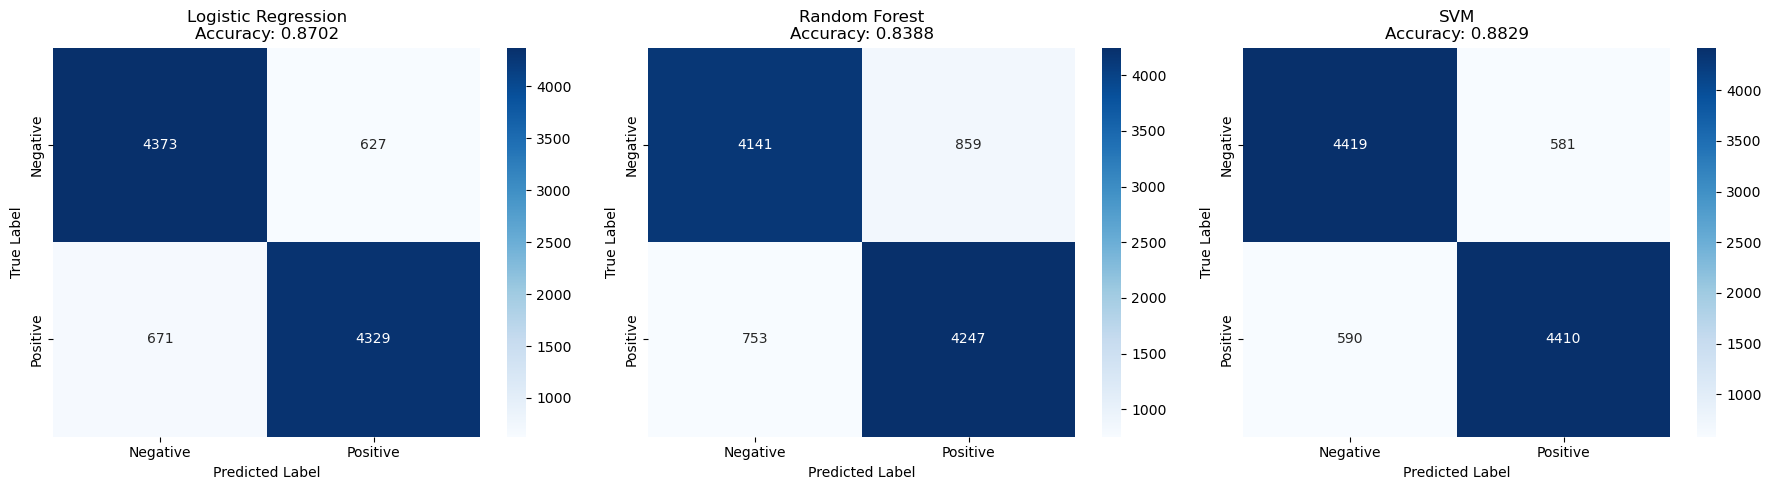

Confusion matrices generated successfully!


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrices for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    axes[idx].set_title(f'{name}\nAccuracy: {result["accuracy"]:.4f}')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

print("Confusion matrices generated successfully!")

In [14]:
# Get the best model
best_model = results[best_model_name]['model']

# Test reviews
test_reviews = [
    "This movie was absolutely fantastic! The acting was superb and the story kept me engaged throughout.",
    "Terrible waste of time. Poor acting, boring plot, and bad cinematography.",
    "It was okay, not great but not terrible either. Just average.",
    "One of the best films I've ever seen! Highly recommended!",
    "I hated every minute of it. Worst movie ever made."
]

print("Testing custom reviews with the best model:")
print("="*80)

for i, review in enumerate(test_reviews, 1):
    # Create embedding
    embedding = get_document_embedding(review, w2v_model)
    embedding_scaled = scaler.transform(embedding.reshape(1, -1))
    
    # Predict
    prediction = best_model.predict(embedding_scaled)[0]
    sentiment = "Positive" if prediction == 1 else "Negative"
    
    # Get probability if available
    if hasattr(best_model, 'predict_proba'):
        proba = best_model.predict_proba(embedding_scaled)[0]
        confidence = proba[prediction]
        print(f"\n{i}. Review: {review[:70]}...")
        print(f"   Prediction: {sentiment} (Confidence: {confidence:.2%})")
    else:
        print(f"\n{i}. Review: {review[:70]}...")
        print(f"   Prediction: {sentiment}")

print("\n" + "="*80)

Testing custom reviews with the best model:

1. Review: This movie was absolutely fantastic! The acting was superb and the sto...
   Prediction: Positive

2. Review: Terrible waste of time. Poor acting, boring plot, and bad cinematograp...
   Prediction: Positive

3. Review: It was okay, not great but not terrible either. Just average....
   Prediction: Positive

4. Review: One of the best films I've ever seen! Highly recommended!...
   Prediction: Positive

5. Review: I hated every minute of it. Worst movie ever made....
   Prediction: Positive



In [15]:
import pickle

# Save the best model and scaler
model_filename = f'{best_model_name.lower().replace(" ", "_")}_sentiment.pkl'
scaler_filename = 'scaler_sentiment.pkl'

with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)

print(f"Best model ({best_model_name}) saved to: {model_filename}")
print(f"Scaler saved to: {scaler_filename}")
print(f"\nModel Summary:")
print(f"  - Model: {best_model_name}")
print(f"  - Accuracy: {best_accuracy:.4f}")
print(f"  - Features: Word2Vec embeddings (dimension: {w2v_model.wv.vector_size})")
print(f"  - Training samples: {len(X_train)}")
print(f"  - Testing samples: {len(X_test)}")
print("\n" + "="*80)
print("COMPLETE! All models trained and best model saved successfully!")
print("="*80)

Best model (SVM) saved to: svm_sentiment.pkl
Scaler saved to: scaler_sentiment.pkl

Model Summary:
  - Model: SVM
  - Accuracy: 0.8829
  - Features: Word2Vec embeddings (dimension: 100)
  - Training samples: 40000
  - Testing samples: 10000

COMPLETE! All models trained and best model saved successfully!
